In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import preprocessing

In [124]:
pacientes = pd.read_csv('dataFinal.csv', sep=';', header=None)
pacientes = pacientes[1:]
pacientes.head()

,0,1,2,3,4,5,6,7,8,9,10,11
1,Mujer,Heterosexual,Femenino,41,No aporta,Mestizo/a,Desarrollo Humano,Embarazadas,710 Primera,0,0,Z300 CONSEJO Y ASESORAMIENTO GENERAL SOBRE LA ...
2,Mujer,Heterosexual,Femenino,69,Seguro ISSPOL,Mestizo/a,Ninguno,No aplica,0,710 Primera,226 Definitivo Control,Z501 OTRAS TERAPIAS FISICAS
3,Hombre,Heterosexual,Masculino,73,"IESS, Afiliado seguro Campesino",Mestizo/a,Ninguno,No aplica,0,710 Primera,226 Definitivo Control,Z501 OTRAS TERAPIAS FISICAS
4,Mujer,Heterosexual,Femenino,23,No aporta,Mestizo/a,Ninguno,Planificacion Familiar,711 Subsecuente,0,0,Z501 OTRAS TERAPIAS FISICAS
5,Hombre,Heterosexual,Masculino,19,No aporta,Mestizo/a,Ninguno,No aplica,0,710 Primera,226 Definitivo Control,Z501 OTRAS TERAPIAS FISICAS


In [125]:
# poner todos en minusculas
for x in range(len(pacientes.columns)):    
    for i in range(len(pacientes[1])):
        pacientes.iloc[i,x] = pacientes.iloc[i,x].lower() 
#mostrar valores unicos
for i in range(len(pacientes.columns)):
    print(f'Columna {i}: {pacientes[i].unique()}')
pacientesOriginales = pacientes

Columna 0: ['mujer' 'hombre']
Columna 1: ['heterosexual' 'no aplica' 'lesbiana' 'gay' 'no sabe/no responde'
 'bisexual']
Columna 2: ['femenino' 'masculino' 'no aplica' 'no sabe/no responde']
Columna 3: ['41' '69' '73' '23' '19' '31' '34' '2' '14' '38' '10' '7' '32' '16' '47'
 '11' '0' '5' '22' '76' '72' '40' '17' '35' '4' '1' '63' '91' '56' '27'
 '70' '8' '46' '25' '52' '6' '29' '15' '12' '21' '24' '55' '37' '54' '39'
 '65' '61' '3' '78' '48' '20' '50' '42' '83' '85' '9' '45' '36' '33' '28'
 '26' '13' '30' '18' '64' '58' '75' '49' '77' '79' '90' '80' '84' '44'
 '87' '59' '92' '60' '53' '51' '43' '66' '67' '86' '74' '62' '68' '93'
 '81' '71' '57']
Columna 4: ['no aporta' 'seguro isspol' 'iess, afiliado seguro campesino'
 'iess, afiliado seguro general' 'seguro indirecto']
Columna 5: ['mestizo/a' 'indígena' 'no aplica' 'blanco/a' 'no sabe/no responde'
 'montubio/a']
Columna 6: ['desarrollo humano' 'ninguno' 'joaquín gallegos lara' 'manuela espejo']
Columna 7: ['embarazadas' 'no aplica' '

In [126]:
# Si algún atributo es una cadena, debe codificarse. 

label_encoder = [] 

for columna, valor in enumerate(pacientes.iloc[0,:]):    
    print(f'{valor}---{columna}')
    if valor.isdigit() and int(valor) != 0: # para la columna 9 y 10 uqe tienen un 0 como primer valor
        pacientes.iloc[:,columna] = pacientes.iloc[:,columna] 
    else:
        label_encoder.append(preprocessing.LabelEncoder()) #creacion de instancia de label enconder
        pacientes.iloc[:,columna] = label_encoder[-1].fit_transform(pacientes.iloc[:,columna]) # se codifica toda la columna
        pacientes.iloc[:,columna].astype(int)


mujer---0
heterosexual---1
femenino---2
41---3
no aporta---4
mestizo/a---5
desarrollo humano---6
embarazadas---7
710 primera---8
0---9
0---10
z300 consejo y asesoramiento general sobre la anticoncepcion---11


In [127]:

pacientes.head()

,0,1,2,3,4,5,6,7,8,9,10,11
1,1,2,0,41,2,2,0,0,1,0,0,49
2,1,2,0,69,4,2,3,2,0,1,4,59
3,0,2,1,73,0,2,3,2,0,1,4,59
4,1,2,0,23,2,2,3,4,2,0,0,59
5,0,2,1,19,2,2,3,2,0,1,4,59


In [128]:
pacientes.describe()

,0,1,2,4,5,6,7,8,9,10,11
count,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000
mean,0.658199,2.424942,0.681293,1.889145,1.995381,2.324480,2.161663,0.454965,0.749423,1.923788,52.750577
std,0.474587,0.829807,0.821698,0.477660,0.198204,1.247342,0.719158,0.654680,0.645683,1.796261,13.244439
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,44.000000
50%,1.000000,2.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,1.000000,1.000000,59.000000
75%,1.000000,2.000000,1.000000,2.000000,2.000000,3.000000,2.000000,1.000000,1.000000,4.000000,61.000000
max,1.000000,5.000000,3.000000,4.000000,5.000000,3.000000,4.000000,2.000000,2.000000,4.000000,62.000000


In [129]:
#busqueda de cantidad optima de clusters
clusters = []
for i in range(1,18):#maximo analizar con 11 clusters
    kmeans = KMeans(n_clusters = i, max_iter = 10000)
    kmeans.fit(pacientes)
    clusters.append(kmeans.inertia_)


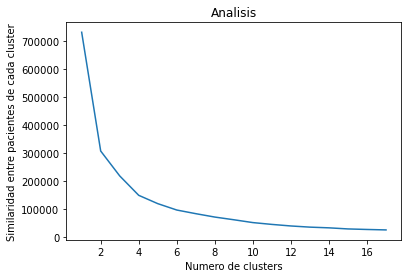

In [130]:
plt.plot(range(1, 18), clusters)
plt.title("Analisis")
plt.xlabel("Numero de clusters")
plt.ylabel("Similaridad entre pacientes de cada cluster")
plt.show()

In [131]:
# analisando la grafica del codo de jambu, podemos 4 clusters seria el numero optimo de clusters
clustering = KMeans(n_clusters = 4, max_iter = 10000)
clustering.fit(pacientes)

KMeans(max_iter=10000, n_clusters=4)

In [132]:
pacientesOriginales['Cluster'] = clustering.labels_
pacientesOriginales.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,Cluster
1,1,2,0,41,2,2,0,0,1,0,0,49,1
2,1,2,0,69,4,2,3,2,0,1,4,59,0
3,0,2,1,73,0,2,3,2,0,1,4,59,0
4,1,2,0,23,2,2,3,4,2,0,0,59,1
5,0,2,1,19,2,2,3,2,0,1,4,59,2
6,1,2,0,31,2,2,3,0,1,0,0,9,3
7,1,2,0,34,2,2,3,2,0,1,4,59,1
8,0,4,2,2,2,2,3,2,1,0,0,61,2
9,1,2,0,14,2,2,3,2,0,1,4,61,2
10,1,2,0,38,2,2,0,4,0,1,4,61,1
